In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [19]:
import numpy as np

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [14]:
data = "/Users/diegoesparza/CS_Ventures/current_projects/chess_engine_using_probabilities/output"

In [20]:
df = pd.read_csv(data)
df["sqrt_sum_square_diffs"] = np.sqrt(df["sum_square_diffs"])

In [21]:
df

,base,sum_square_diffs,phase,sqrt_sum_square_diffs
0,-85.000000,1.722188e+06,1.000000,1312.321737
1,-28.000000,1.145820e+06,1.000000,1070.429937
2,37.000000,8.081850e+05,1.000000,898.991101
3,-12.000000,3.615970e+05,1.000000,601.329361
4,-2.000000,5.312550e+05,1.000000,728.872417
...,...,...,...,...
19995,-346.750000,2.988200e+07,0.750000,5466.443422
19996,-826.166667,1.084285e+08,0.791667,10412.899132
19997,-342.500000,2.076359e+07,0.750000,4556.708354
19998,-796.125000,7.926131e+07,0.791667,8902.882168


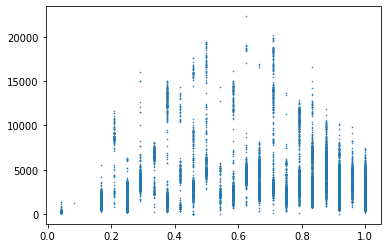

In [23]:
plt.scatter(df["phase"], df["sqrt_sum_square_diffs"], s=.3)
plt.show()

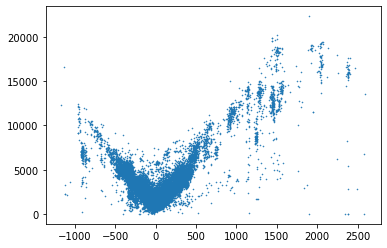

In [24]:
plt.scatter(df["base"], df["sqrt_sum_square_diffs"], s=.3)
plt.show()

In [44]:
pred_scaler = MinMaxScaler()
res_scaler = MinMaxScaler()
df[["base_norm", "phase_norm"]] = \
    pred_scaler.fit_transform(df[["base", "phase"]])
df[["res_norm"]] = res_scaler.fit_transform(df[["sqrt_sum_square_diffs"]])


x = df[["base_norm", "phase_norm"]]
y = df["res_norm"]
degree = 2
poly = PolynomialFeatures(degree)
model = make_pipeline(poly, LinearRegression())
model.fit(x, y)
linear_reg = model.named_steps["linearregression"]
for feature, coeff in zip(poly.get_feature_names(input_features=x.columns), linear_reg.coef_):
    print(f"{feature}: {coeff}")
print(linear_reg.intercept_)

1: 0.0
base_norm: -1.663272074274638
phase_norm: 0.44642217375870274
base_norm^2: 2.4224883578540246
base_norm phase_norm: 0.3878384612968099
phase_norm^2: -0.4697134266154033
0.2755828435244434


In [45]:
predictions_scaled = model.predict(x)
predictions = res_scaler.inverse_transform(predictions_scaled.reshape(-1, 1))
df["predictions"] = predictions

In [50]:
df["error"] = abs(df["sqrt_sum_square_diffs"] - df["predictions"])

In [51]:
df

,base,sum_square_diffs,phase,sqrt_sum_square_diffs,base_norm,phase_norm,res_norm,predictions,error
0,-85.000000,1.722188e+06,1.000000,1312.321737,0.288848,1.000000,0.058752,1920.963573,608.641836
1,-28.000000,1.145820e+06,1.000000,1070.429937,0.303974,1.000000,0.047923,1975.247065,904.817128
2,37.000000,8.081850e+05,1.000000,898.991101,0.321222,1.000000,0.040248,2067.364985,1168.373884
3,-12.000000,3.615970e+05,1.000000,601.329361,0.308220,1.000000,0.026921,1994.934969,1393.605609
4,-2.000000,5.312550e+05,1.000000,728.872417,0.310873,1.000000,0.032631,2008.230587,1279.358171
...,...,...,...,...,...,...,...,...,...
19995,-346.750000,2.988200e+07,0.750000,5466.443422,0.219389,0.739130,0.244731,3652.496444,1813.946978
19996,-826.166667,1.084285e+08,0.791667,10412.899132,0.092170,0.782609,0.466183,5193.702958,5219.196174
19997,-342.500000,2.076359e+07,0.750000,4556.708354,0.220517,0.739130,0.204003,3644.663525,912.044829
19998,-796.125000,7.926131e+07,0.791667,8902.882168,0.100142,0.782609,0.398580,5034.534379,3868.347788


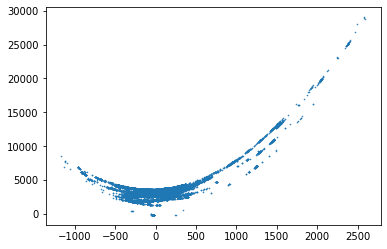

In [48]:
plt.scatter(df["base"], df["predictions"], s=.3)
plt.show()

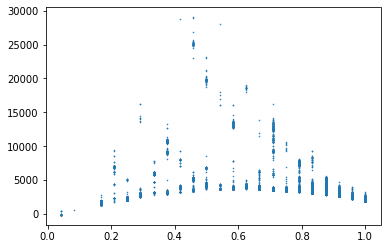

In [49]:
plt.scatter(df["phase"], df["predictions"], s=.3)
plt.show()

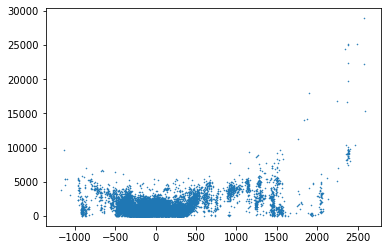

In [55]:
plt.scatter(df["base"], df["error"], s=.3)
plt.show()

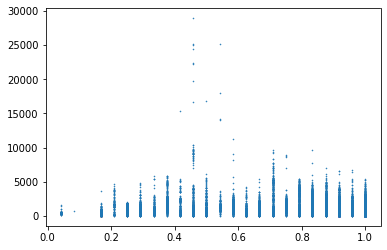

In [56]:
plt.scatter(df["phase"], df["error"], s=.3)
plt.show()